## 概率统计方法

### 简介

**Python**中常用的统计工具有**Numpy, Pandas, PyMC, StatsModels**等。

**Scipy**中的子库scipy.stats中包含很多统计上的方法。

导入numpy和matplotlib：

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

Numpy自带简单的统计方法：

In [4]:
print('mean, ',heights.mean())
print("min, ",heights.min())
print("max, ", heights.max())
print("standard deviation, ", heights.std())

mean,  1.756
min,  1.46
max,  2.01
standard deviation,  0.150811140172


导入**Scipy**的统计模块：

In [16]:
import scipy.stats.mstats as st

_（scipy的官方网站上并未找到stats.stats,倒是可以看到stats.mstats，但是两个都可以运行，计算结果也基本相同，只是精度略有差异，猜测是版本升级了，保持了兼容性）_

其他统计量：

In [20]:
#print("median, ", st.nanmedian(heights))  #忽略nan直之后的中位数,mstats和stats中都没有此函数
print("median, ", st.hdmedian(heights))     
print("mode, ", st.mode(heights))         #众数及其出现次数
print("skewness, ", st.skew(heights))     #偏度
print("kurtosis, ", st.kurtosis(heights)) #峰度
print("and so many more ...")

median,  1.7706890443882266
mode,  ModeResult(mode=array([ 1.88]), count=array([ 2.]))
skewness,  -0.3935244564726434
kurtosis,  -0.330672097724
and so many more ...


### 概率分布

常见的[连续概率分布]()有：

* 均匀分布
* 正态分布
* 学生t分布
* F分布
* Gamma分布
* ...

[离散概率分布]()：

* 伯努利分布
* 几何分布
* ...

真写都可以在scipy.stats中找到。

### 连续分布

#### 正态分布

以[正态分布]()为例，先导入正态分布：

In [23]:
from scipy.stats import norm

它包含撕裂常用的函数：

* norm.cdf 返回对应的[累计分布函数]()值
* norm.pdf 返回对应的[概率密度函数]()值
* norm.rvs 产生指定参数的随机变量
* norm.fit 返回给定数据下，各参数的[最大似然估计]()（MLE）值

从正态分布产生500个随机点：

In [25]:
x_norm = norm.rvs(size=500)
type(x_norm)

numpy.ndarray

直方图：

counts,  [   6.   18.   46.   87.  114.  106.   66.   33.   20.    4.]
bin centers [ -2.87236110e+00  -2.29750217e+00  -1.72264324e+00  -1.14778432e+00
  -5.72925387e-01   1.93354108e-03   5.76792469e-01   1.15165140e+00
   1.72651033e+00   2.30136925e+00   2.87622818e+00]


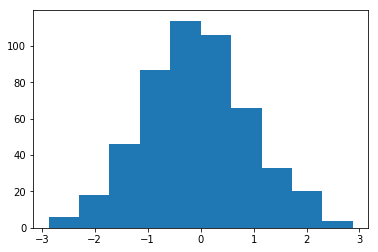

In [26]:
h = hist(x_norm)
print("counts, ", h[0])
print("bin centers", h[1])

归一化直方图（用出现频率代替次数），将划分区间变为20（默认10）：

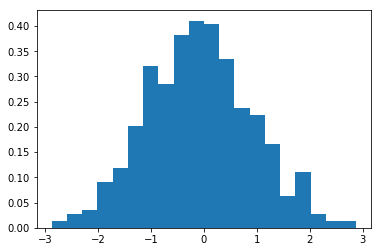

In [30]:
h = hist(x_norm, normed=True, bins=20)

在这组数据下，正态分布参数的最大似然估计为：

In [31]:
x_mean, x_std = norm.fit(x_norm)

print("mean, ", x_mean)
print("x_std, ", x_std)

mean,  -0.0811321693573
x_std,  1.00425322577


将真实的概率密度函数与直方图进行比较：

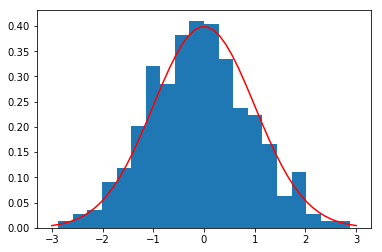

In [33]:
h = hist(x_norm, normed=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

导入积分函数：

In [34]:
from scipy.integrate import trapz

通过积分，计算落在某个区间的概率大小：

95.45% of the values lie between -2 and 2


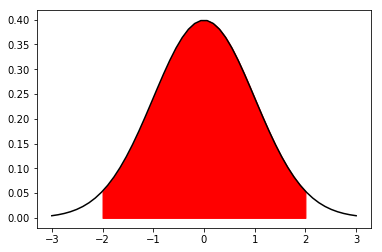

In [35]:
x1 = linspace(-2, 2, 108)
p = trapz(norm.pdf(x1), x1)
print("{:.2%} of the values lie between -2 and 2".format(p))

fill_between(x1, norm.pdf(x1), color="red")
plot(x, norm.pdf(x), "k-")

默认情况，正态分布的参数为均值0， 标准差1， 即标准正态分布。

可以通过loc和scale来调整这些参数，一种方法是调用相关函数是进行输入：

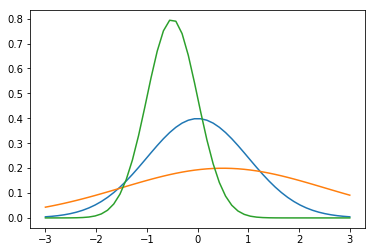

In [38]:
p = plot(x, norm.pdf(x, loc=0,scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=0.5))

另一种则是将loc， scale作为参数直接输出给norm生成相应的分布：

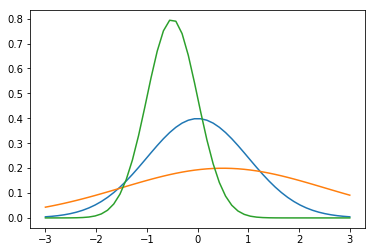

In [41]:
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plot(x, norm(loc=-0.5, scale=.5).pdf(x))